In [28]:
import torch

from torch.utils.data import DataLoader
from torch.nn import BCELoss

from models import Autoencoder
from utils.training_ae import train_autoencoder

from sklearn.cluster import KMeans

from utils import load_fashion_mnist, load_mnist
from utils import plot_losses, plot_ae_reconstructions, plot_all_reconstructions
from utils.plotting import plot_pca

# Load dataset

In [17]:
training_data, testing_data = load_mnist()

train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=64, shuffle=True)

# img_indices = [50563, 24814, 10910, 57495, 57965, 41635]
# img_indices = [50563, 24814, 10910]

# Train or load Autoencoder

In [18]:
ae = Autoencoder()
optimizer = torch.optim.Adam(ae.parameters(), lr=1e-3)
recon_loss = BCELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Uncomment the lines below for custom training

In [19]:
ae_losses = train_autoencoder(
    ae,
    train_loader,
    optimizer,
    recon_loss,
    epochs=100,
    image_indices=None,
    device=device,
)

Epoch 1/100: average loss = 0.1720
Epoch 2/100: average loss = 0.1248
Epoch 3/100: average loss = 0.1145
Epoch 4/100: average loss = 0.1082
Epoch 5/100: average loss = 0.1044
Epoch 6/100: average loss = 0.1022
Epoch 7/100: average loss = 0.1006
Epoch 8/100: average loss = 0.0995
Epoch 9/100: average loss = 0.0984
Epoch 10/100: average loss = 0.0975
Epoch 11/100: average loss = 0.0968
Epoch 12/100: average loss = 0.0962
Epoch 13/100: average loss = 0.0955
Epoch 14/100: average loss = 0.0951
Epoch 15/100: average loss = 0.0945
Epoch 16/100: average loss = 0.0941
Epoch 17/100: average loss = 0.0936
Epoch 18/100: average loss = 0.0933
Epoch 19/100: average loss = 0.0930
Epoch 20/100: average loss = 0.0927
Epoch 21/100: average loss = 0.0924
Epoch 22/100: average loss = 0.0921
Epoch 23/100: average loss = 0.0918
Epoch 24/100: average loss = 0.0916
Epoch 25/100: average loss = 0.0914
Epoch 26/100: average loss = 0.0911
Epoch 27/100: average loss = 0.0910
Epoch 28/100: average loss = 0.0907
E

In [27]:
# checkpoint = {
#     "model_state": ae.state_dict(),
#     "losses": ae_losses,
#     "images": images
# }

torch.save(ae.state_dict(), "../checkpoints/autoencoder_mnist.pth")
# torch.save(checkpoint, "../checkpoints/autoencoder_full.pth")

### Load pretrained Autoencoder

In [4]:
ae = Autoencoder()

checkpoint = torch.load("../checkpoints/autoencoder_fashion_mnist.pth", map_location="cpu")
ae.load_state_dict(checkpoint["model_state"])
ae_losses = checkpoint["losses"]
images = checkpoint["images"]

ae.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=2000, bias=True)
    (5): ReLU()
    (6): Linear(in_features=2000, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=500, bias=True)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

# Plot results

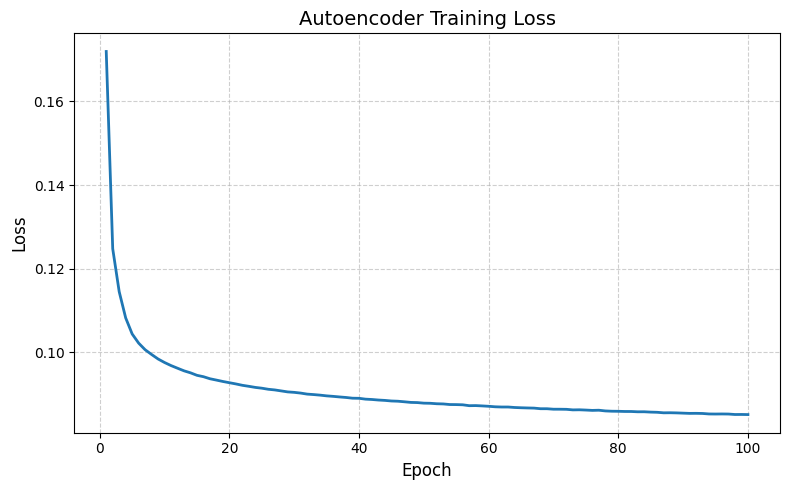

In [21]:
plot_losses(ae_losses)

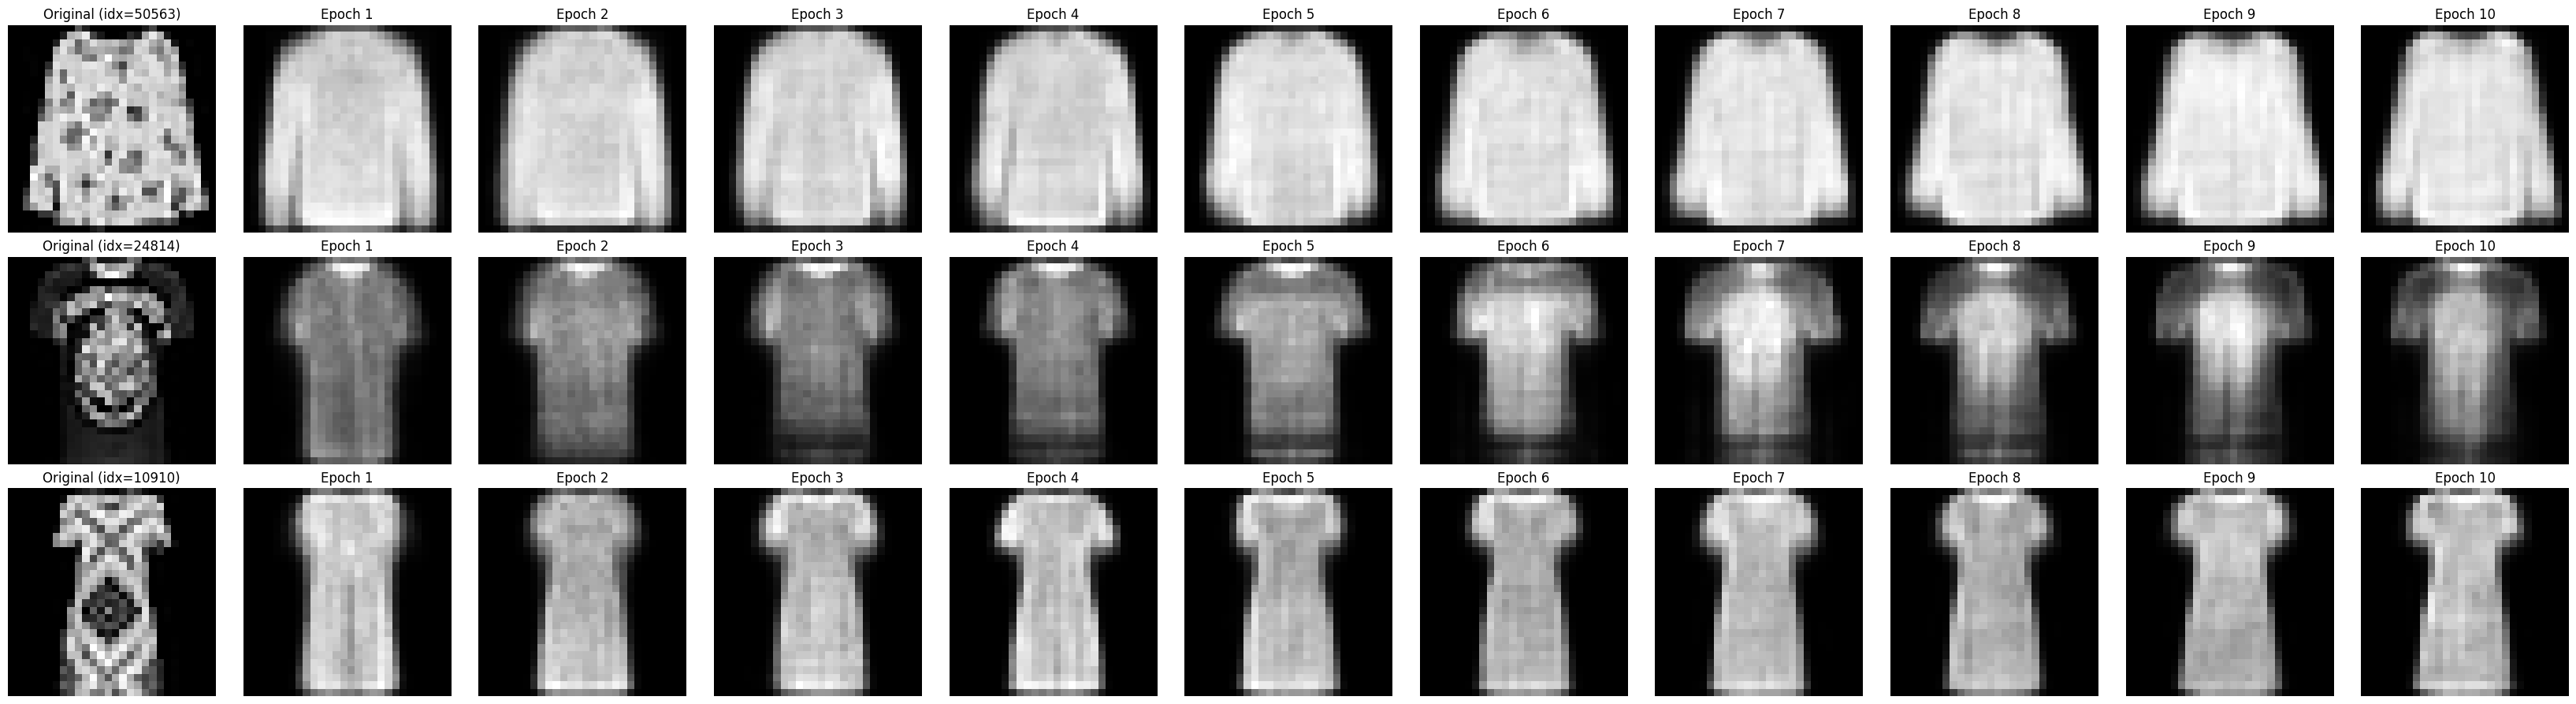

In [6]:
plot_all_reconstructions(images)

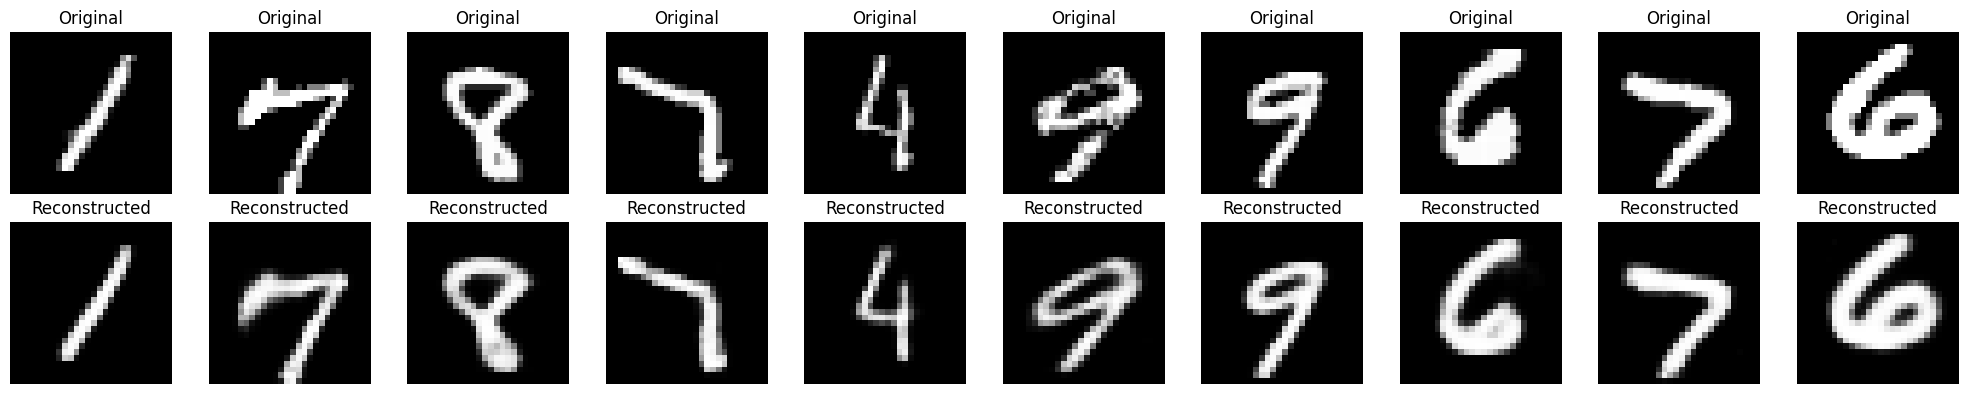

In [46]:
plot_ae_reconstructions(
    ae,
    training_data,
    n=10,
    device=device,
)

In [42]:
kmeans = KMeans(n_clusters=10)

data = training_data.data.float() / 255.0
data = data.view(-1, 784)
tensor_x = data.to(device)
labels = training_data.targets

ae.eval()
with torch.no_grad():
    x_hat, full_z = ae(tensor_x)
    full_z = full_z.cpu().numpy()

predictions = kmeans.fit_predict(full_z)

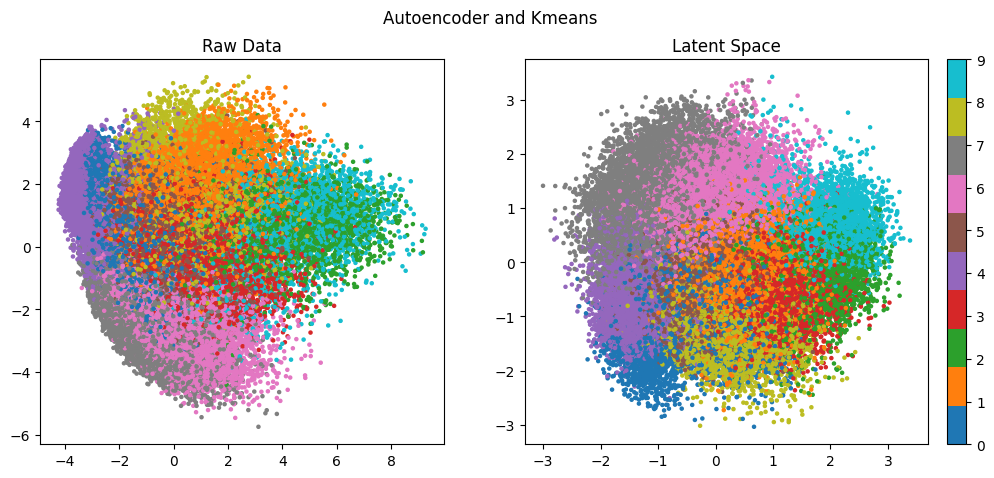

In [43]:
plot_pca(data, full_z, predictions, title="Autoencoder and Kmeans")

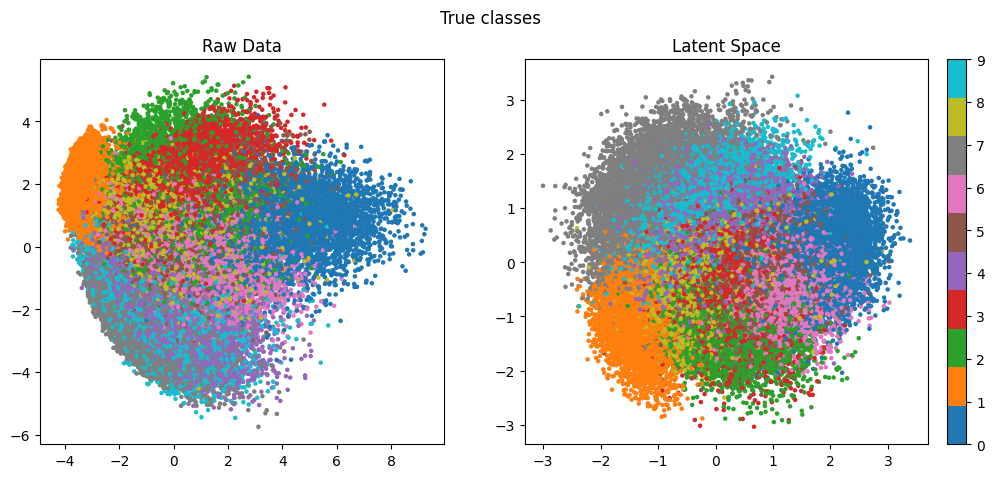

In [44]:
plot_pca(data, full_z, labels, title="True classes")